## Testing the models on the Wheat-US data set

In [1]:
import numpy as np
import pandas as pd
# import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

C:\Users\risha\AppData\Local\Temp\ipykernel_8472\2514745880.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#the start and end date
start_date = dt.datetime(2015,7,23)
end_date = dt.datetime(2018,3,12)

#loading from yahoo finance
# data = yf.download("GOOGL",start_date, end_date)
data = pd.read_csv("C:\\Users\\risha\\OneDrive\\Desktop\\Minor_Project\\Crop_Prediction\\notebooks\\Wheat-US-2.csv");
data.drop(columns=['high','low','close'],axis=1,inplace=True)
data.shape
# TO limit the display rows and columns in output
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
# print(data)
data['date'] = pd.to_datetime(data['date'], format="%d-%m-%Y")
data = data.sort_values(by='date')
data = data.drop(data.index[:100])
data.set_index('date',inplace=True)
data

,open
date,
2014-09-02,561.88
2014-09-03,555.00
...,...
2018-03-09,499.25
2018-03-12,488.50


In [6]:
# Setting 80 percent data for training and remainning 20 % for testing
training_data_len = math.ceil(len(data) * .8)
# training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)
# print(train_data)


(720, 1) (180, 1)


In [7]:
# Selecting Open Price values
dataset_train = train_data.open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(720, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train)
len(scaled_train)

[[0.64998283]
 [0.62373631]
 [0.55079541]
 [0.53362835]
 [0.54602678]
 [0.54125815]
 [0.52313737]
 [0.48308091]
 [0.44397818]
 [0.41868539]
 [0.41059779]
 [0.39819937]
 [0.39915309]
 [0.36768016]
 [0.32426659]
 [0.32522031]
 [0.31568306]
 [0.33811468]
 [0.31282188]
 [0.30282684]
 [0.34002213]
 [0.32857742]
 [0.32998894]
 [0.3505131 ]
 [0.35909663]
 [0.37912486]
 [0.441117  ]
 [0.4449319 ]
 [0.3891199 ]
 [0.40773662]
 [0.43299126]
 [0.45160798]
 [0.43775989]
 [0.48212719]
 [0.47258994]
 [0.46686758]
 [0.49212223]
 [0.49357189]
 [0.51119673]
 [0.47449739]
 [0.50547438]
 [0.5317209 ]
 [0.56079045]
 [0.54793423]
 [0.54984168]
 [0.55842521]
 [0.53362835]
 [0.5088315 ]
 [0.48163125]
 [0.46782131]
 [0.48067753]
 [0.50738183]
 [0.57318888]
 [0.61564872]
 [0.64044558]
 [0.61278755]
 [0.60134285]
 [0.5550681 ]
 [0.59371304]
 [0.61755617]
 [0.60229657]
 [0.63518102]
 [0.65139435]
 [0.63994964]
 [0.7129287 ]
 [0.70720635]
 [0.81593103]
 [0.81020868]
 [0.75680006]
 [0.75393889]
 [0.77015221]
 [0.76

720

In [9]:
# Selecting open price values
dataset_test = test_data.open.values
#reshaping 1d to 2d array
dataset_test = np.reshape(dataset_test,(-1,1))
#Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])


[0.42056666] [0.43795851] [0.59922843] [0.86086517] [1.]


In [10]:
X_train = []
Y_train = []

for i in range(50,len(scaled_train)):
    X_train.append(scaled_train[i-50:i,0])
    Y_train.append(scaled_train[i,0])
    if i <= 51:
        print(X_train)
        print(Y_train)
        print()

[array([0.64998283, 0.62373631, 0.55079541, 0.53362835, 0.54602678,
       0.54125815, 0.52313737, 0.48308091, 0.44397818, 0.41868539,
       0.41059779, 0.39819937, 0.39915309, 0.36768016, 0.32426659,
       0.32522031, 0.31568306, 0.33811468, 0.31282188, 0.30282684,
       0.34002213, 0.32857742, 0.32998894, 0.3505131 , 0.35909663,
       0.37912486, 0.441117  , 0.4449319 , 0.3891199 , 0.40773662,
       0.43299126, 0.45160798, 0.43775989, 0.48212719, 0.47258994,
       0.46686758, 0.49212223, 0.49357189, 0.51119673, 0.47449739,
       0.50547438, 0.5317209 , 0.56079045, 0.54793423, 0.54984168,
       0.55842521, 0.53362835, 0.5088315 , 0.48163125, 0.46782131])]
[0.4806775264181893]

[array([0.64998283, 0.62373631, 0.55079541, 0.53362835, 0.54602678,
       0.54125815, 0.52313737, 0.48308091, 0.44397818, 0.41868539,
       0.41059779, 0.39819937, 0.39915309, 0.36768016, 0.32426659,
       0.32522031, 0.31568306, 0.33811468, 0.31282188, 0.30282684,
       0.34002213, 0.32857742, 0.329

In [11]:
X_test = []
Y_test = []

for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i,0])
    Y_test.append(scaled_test[i,0])


In [12]:
# The data is converted to numpy array
X_train, Y_train = np.array(X_train),np.array(Y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))

In [13]:
# The data is converted to numpy array
X_test, Y_test = np.array(X_test), np.array(Y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
Y_test = np.reshape(Y_test, (Y_test.shape[0],1))
print("X_test :",X_test.shape,"Y_test :",Y_test.shape)


X_test : (130, 50, 1) Y_test : (130, 1)


In [14]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [15]:

# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								# decay=1e-6,
								momentum=0.9,
								nesterov=True),
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, Y_train, epochs = 10, batch_size = 2)
regressor.summary()


Epoch 1/10


c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


335/335 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0269
Epoch 2/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0051
Epoch 3/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0043
Epoch 4/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0034
Epoch 5/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0034
Epoch 6/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0029
Epoch 7/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0031
Epoch 8/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0026
Epoch 9/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0027
Epoch 10/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0024


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)            │      2,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 50, 50)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)            │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)            │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)                │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 1)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [17]:

#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
					return_sequences = True,
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
				Y_train,
				batch_size = 1,
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.0111 - loss: 0.0097
Epoch 2/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.0018 - loss: 0.0031
Epoch 3/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.0032 - loss: 0.0021
Epoch 4/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.0026 - loss: 0.0017
Epoch 5/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.0020 - loss: 0.0016
Epoch 6/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.0014 - loss: 0.0016
Epoch 7/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.0020 - loss: 0.0014
Epoch 8/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.0060 - loss: 0.0016
Epoch 9/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.0014 - loss: 0.0014
Epoch 10/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.0023 - loss: 0.0016
Epoch 11/12
670/670 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.0014 - loss: 0.0014
Epoch 12/12
670/670 ━━━━━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)            │     10,400 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)                │     20,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 25)                │      1,275 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 1)                 │         26 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [16]:

#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
					activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
								# decay=1e-7,
								momentum=0.9,
								nesterov=False),
					loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,Y_train,epochs=10,batch_size=1)
regressorGRU.summary()


Epoch 1/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - loss: 0.0253
Epoch 2/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - loss: 0.0086
Epoch 3/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - loss: 0.0039
Epoch 4/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0045
Epoch 5/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - loss: 0.0040
Epoch 6/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - loss: 0.0038
Epoch 7/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - loss: 0.0030
Epoch 8/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - loss: 0.0027
Epoch 9/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 0.0041
Epoch 10/10
670/670 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - loss: 0.0033


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50, 50)            │      7,950 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ gru_1 (GRU)                     │ (None, 50, 50)            │     15,300 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ gru_2 (GRU)                     │ (None, 50, 50)            │     15,300 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ gru_3 (GRU)                     │ (None, 50)                │     15,300 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 107,804 (421.11 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,903 (210.56 KB)

In [19]:

# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

13/13 [==============================] - 2s 22ms/step


In [20]:

# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_GRU_O = scaler.inverse_transform(y_GRU)

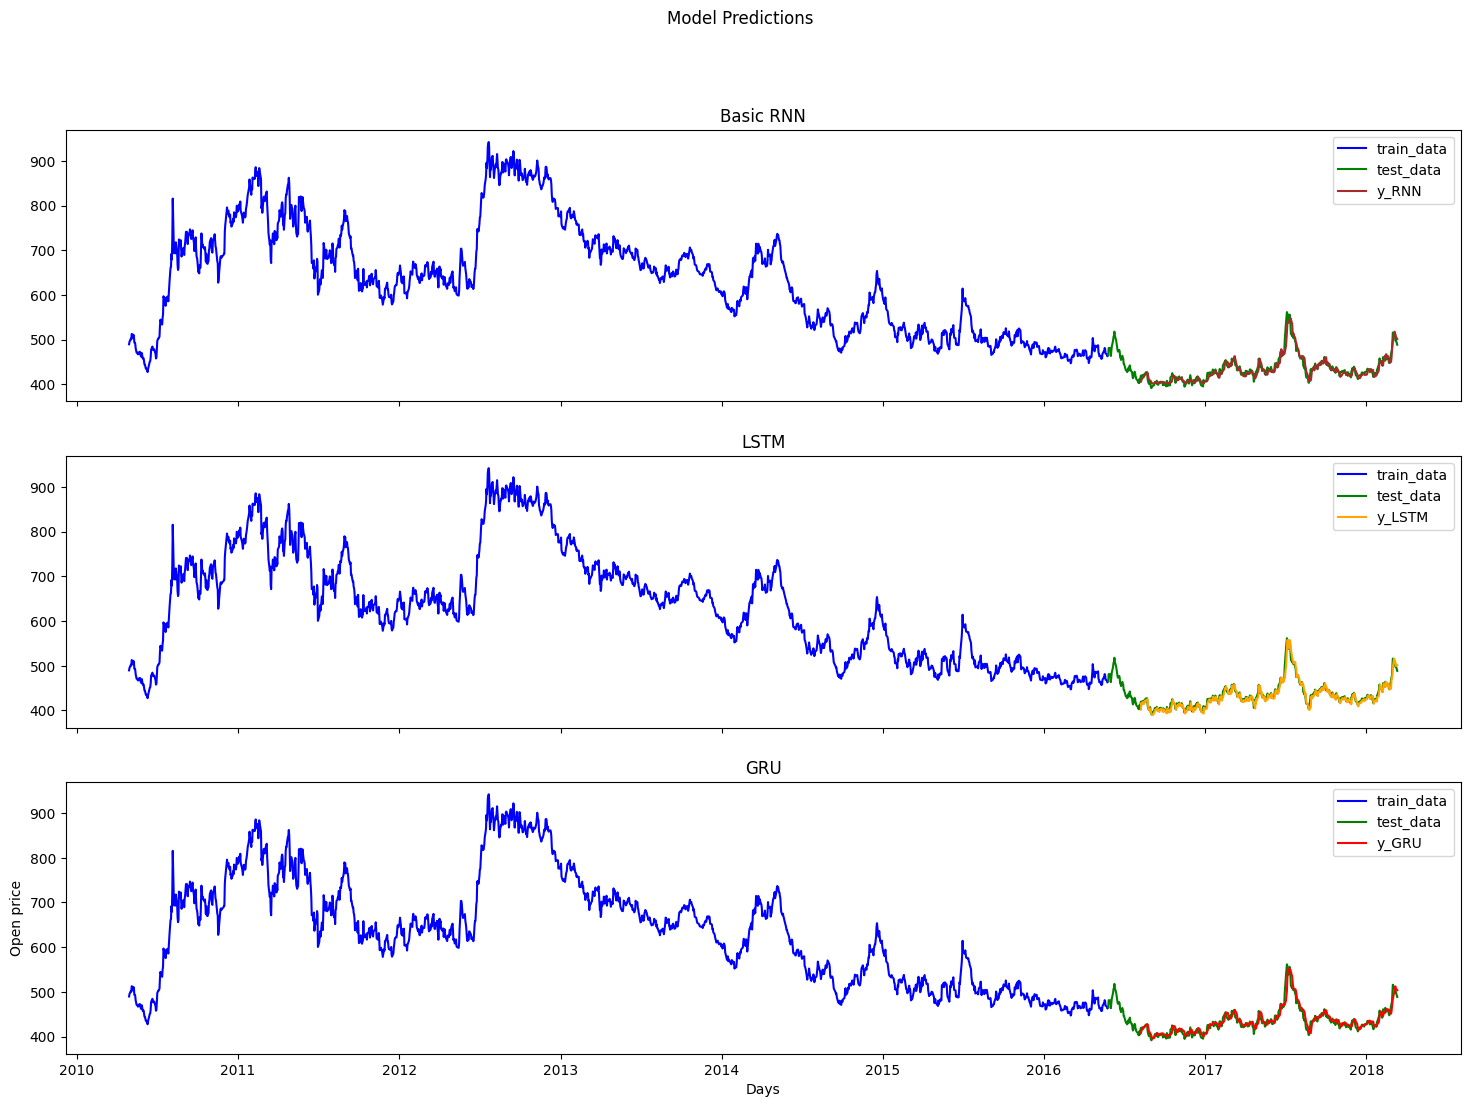

In [21]:

fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()
